![title](plantilla.png)


El objetivo en este problema de regresión es construir un modelo para predecir el precio de una casa en Boston. Los datos se pueden cargar de los dataset que se encuentran en la libreria scikit-learn de python. Para solucionar realice las siguientes tareas:

1. Cargen los datos *boston* de la librería scikit learn.
2. Piensen como deberia ser el problema de regresión, formule el problema y aplique una regresion lineal multivariable normal, y una regularizada.
3. Modifique la matriz de regresores para obtener una estimación no lineal del precio de las casas. ¿Es necesario hacer esto?
4. Implemente una regresión utilizando LASSO.

Como el objetivo es evaluar sus conocimientos deben responder las siguientes preguntas:

1. ¿Qué modificación le hizó a la matriz de regresores? ¿Porqué hizó esos cambios?
2. ¿Que diferencias encuentra entre la regresión regularizada y la no regularizada?, ¿Cuál es mejor en su opinió? ¿Porqué?
3. ¿Cómo son los resultados proporcionados por LASSO, comparados con los que obtuvo con la regresion regularizada?
4. ¿Qué mejoras le haría al algoritmo? ¿Es un modelo lineal suficiente para solucionar este problema?
5. ¿Qué puede concluir si observa lso valores de los parámetros $\theta$? ¿Es bueno analizar directamente estos valores?
6. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de regresión y como se aplicó en este proyecto.

Deben realizar su proyecto en grupos de 3 o 4 alumnos, y entregar un notebook de jupyter con el código documentado con el análisis de cada una de las partes, es decir una explicación de que hace en cada parte del código; además, deben incluir las respuestas a las preguntas realizadas. Al entregar el notebook, por favor use la convención Nombre1__Apellido1_Regresión_1_ML.

**Nota:** Si las respuestas no son claras, o si su procedimiento nos está justificado, no se tendrá en cuenta. No olviden sus referencias.

**Solución:**

**1)** Primero cargamos las librerias necesaria para realizar nuestro taller y tambien los datos de la libreria sklearn, ponemos el comando warnings debido a que este dataset en estos momentos posee un problema de tipo etico con las variables que contiene.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sea 
from sklearn.datasets import load_boston
warnings.filterwarnings('ignore')
dataset = load_boston()

Ahora veamos que de consta nuestro conjunto de datos mediante dataset.DESCR, el cual explica el significado de cada variable. Hemos puesto tal información en la siguiente tabla.

In [3]:
#print(dataset.DESCR)

Variable | Significado
:-----:|:-----| 
CRIM|Tasa de criminalidad per cápita por sector.
ZN|Proporción de suelo residencial zonificado para lotes  de más de 25,000 pies cuadrados|
INDUS|Proporción de acres comerciales no minoristas por sector.|
CHAS|Variable ficticia de Charles River (= 1 si el tramo limita con el río ; 0 en caso contrario)|
NOX |Concentración de óxidos nítricos (partes por 10 millones)|
RM|Promedio de cuartos por vivienda|
AGE|Proporción de unidades ocupadas por sus propietarios construidas antes de 1940|
DIS|Distancias ponderadas a cinco centros de empleo de Boston|
RAD|Índice de accesibilidad a las carreteras radiales|
TAX|tasa de impuesto a la propiedad de valor total por $\$10,000$|
PTRATIO|Ratio alumno-docente por sector|
B|$1000(Bk - 0.63)^{2}$, donde Bk es la proporción de negros por ciudad|
LSTAT|$\%$ de bajo estrato de la población|
MEDV|Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares|

Convertimos nuestro conjunto de datos a un data frame y verificamos la dimensión de estos.

In [4]:
boston = pd.DataFrame(dataset.data, columns = dataset.feature_names)
boston.shape

(506, 13)

Cabe aclarar que tenemos $506$ filas (observaciones) y $13$ columnas (variables), pero en la tabla anterior tenemos $14$ caracteristicas, esto se debe a que en el data frame de boston no está contenida nuestra variable a predecir o target, la cual es **MEDV**. Por eso la agregamos y posterioemente tenemos un primer acercamiento a nuestro conjunto de datos mediante la función head para para visualizar los primeros $5$ datos.

In [18]:
boston["target"]=dataset.target
boston.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


**2)** Como queremos ajustar un modelo de regresión lineal multivariada primero haremos un análisis de correlación entre las variables y mirar cuales podrían estar más correlacionadas con nuestro target. No obstante debemos tener especial cuidado con la multicolinealidad, esto lo explicaremos enseguida con nuestras variables. 

<AxesSubplot:>

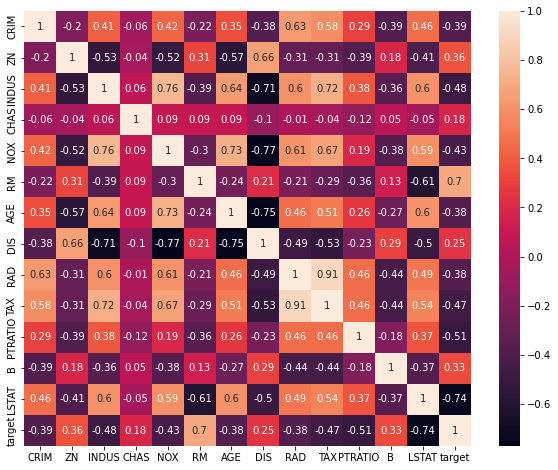

In [6]:
matriz_correlacion = boston.corr().round(2)
plt.figure(figsize=(10,8))
sea.heatmap(data=matriz_correlacion, annot=True)

De nuestra matriz de correlación podemos ver que la variable **RM** tiene una correlación de $0.7$ con nuestro target y por tanto podria ser una muy buena variable predictora para añadir al modelo, otra caracteristica que tiene una alta correlación es **LSTAT** en este caso tiene un correlación de $-0.74$. En este momento estariamos bastante tentados a colocar las caracteristicas **RM** y **LSTAT** como variables regresoras de nuestro target, no obstante no hemos analizado la colinealidad entre estas dos, en nuestro caso tienen una correlación de $-0.61$ la cual es medianamente alta, pero supongamos por un momento que queremos agregar a nuestro modelo las variables **RAD** y **TAX**, estas dos caracteristicas en particular tienen un correlación de $0.91$ y por tanto no deberiamos agregar estas dos variables en simultanea a nuestro modelo, ya que generaria un problema de colinealidad. Lo que hace que la colinealidad sea un problema grave en los modelos de regresión es que a la hora de calcular nuestro vector de parametros $\theta=(X^{T}X)^{-1}Xy$, la inversa de la matriz $X^{T}X$ será sensible a pequeños cambios, es decir que si ingresamos nuevos datos, la inversa de esta matriz cambiara mucho de una muestra a otra y por tanto tendremos una alta en la varianza en nuestro vector de parametros $\theta$. En general a las matrices que poseen este problema se les denomina matriz mal condicionada. En [1] podemos encontrar una medida de mal condicionamiento que viene dado por:
$$\kappa(X)=\sqrt{\displaystyle{\lambda_{máx}(X^{T}X)\over \lambda_{mín}(X^{T}X)}}\, \in [1,\infty)$$
donde $\lambda$ representa los eigenvalores de la matriz $X^{T}X$, el número de mal condicionamiento o número kappa da una idea de que tan mal condicionada está la matriz de diseño, en [2] podemos ver que para $\kappa(X)=1$ tenemos una matriz perfectamente condicionada, es decir que la colinealidad no está presente, para valores entre [5,10] son considerados como aceptables o posee un mal condicionamiento leve, si $\kappa \to \infty $ el mal condicionamiento tendera a ser más alto. 

Antes de crear el modelo veamos una grafica para apreciar mejor la correlación entre las variables RM, LSTAT y nuestro target.

Text(0.5, 0, 'LSTAT')

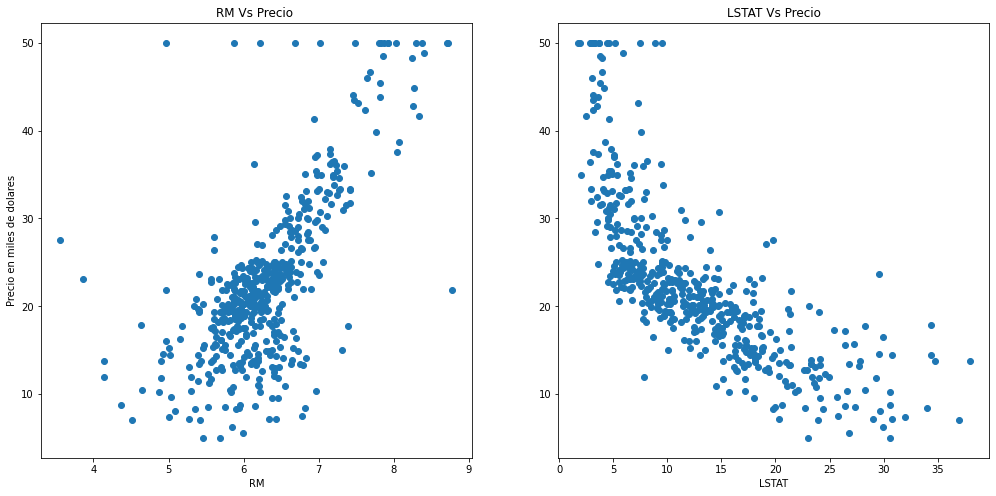

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,8))
ax1.scatter(boston['RM'], boston['target'])
ax1.set_title("RM Vs Precio ")
ax1.set_xlabel("RM")
ax1.set_ylabel("Precio en miles de dolares")
ax2.scatter(boston['LSTAT'], boston['target'])
ax2.set_title("LSTAT Vs Precio")
ax2.set_xlabel("LSTAT")

De nuestro analisis anterior proponemos un modelo de regresión lineal multivariada con la variables **RM** y **LSTAT**, configurado de la siguiente forma:

$$\text{target} = \theta_{1} \,\text{LSTAT} + \theta_{2}\,\text{RM} + \theta_{0}$$

In [20]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO']], columns = ['LSTAT','RM', 'PTRATIO'])
Y = boston['target']

Ahora partimos nuestro conjunto de datos en $80\%$ de entrenamiento y $20\%$ de testeo.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

Creamos nuestros modelo de regresión lineal multivariada:

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from IPython.display import display, Latex, Math

regresion = LinearRegression()
regresion.fit(X_train, Y_train)

LinearRegression()

Obtengamos los coeficientes de regresión estimados:

In [23]:
display(Math(r'\theta_{0}='),np.round(regresion.intercept_,2))
display(Math(r'(\theta_{1},\theta_{2})='),np.round(regresion.coef_,2))

<IPython.core.display.Math object>

23.68

<IPython.core.display.Math object>

array([-0.65,  3.92, -0.95])

Por tanto nuestro modelo queda configurado de la siguiente forma:

$$\text{target} = -0.72\,\text{LSTAT} + 4.59\,\text{RM} + 2.74 $$

Veamos que tan bueno es nuestro modelo calculando su Error Cuadratico Medio (MSE) y el $R^{2}$ solo con los datos de entrenamiento:

In [24]:
y_train_predict = regresion.predict(X_train)
mse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)));print("Error Cuadratico Medio (Train):",mse)
r2 = r2_score(Y_train, y_train_predict);display(Latex(f'$R^{2}=$'),r2)

Error Cuadratico Medio (Train): 5.303863193307931


<IPython.core.display.Latex object>

0.6725214335656511

Entrenamiento sin PTRATIO
MSE = 5.6371
R**2 = 0.63

Entrenamiento con PTRATIO
MSE = 5.3038
R**2 = 0.67


Calculemos lo mismo pero ahora con el conjunto de testeo:

In [25]:
y_test_predict = regresion.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)));print("Error Cuadratico Medio (Test):",rmse)
r21 = r2_score(Y_test, y_test_predict);display(Latex(f'$R^{2}=$'),r21)

Error Cuadratico Medio (Test): 4.9139375347640835


<IPython.core.display.Latex object>

0.691587828074417

Testeo sin PTRATIO
MSE = 5.1374
R**2 = 0.662

Testeo con PTRATIO
MSE = 4.91
R**2 = 0.69

Podemos ver que el Error cuadratico medio y el $R^{2}$ no difieren considerablamente cuando los calculamos con el conjunto de entramiento y testeo, esto parece bueno, ya que pareciera que tenemos un modelo estable, no obstante el valor de $R^{2}$ no es tan bueno, recordemos que lo deseable es que esté proximo a $1$, pero no tanto como para causar un sobreajuste. Este valor de $R^{2}=0.66$ nos indica que el solo $66\%$ de la variación de nuestro target es explicada por nuestro regresores. 

**Regularización**


**Bibliografía** 

[1] Groß, Jürgen. (2003): Linear Regression. Springer-Verlag Berlin Heidelberg, Berlin. 

[2] Belsley, D.A., Kuh, E., Welsch, R.E. (1980): Regression Diagnostics. Wiley,
New York.